In [ ]:
# Tutorial



#tutorial said 2.1.0
#!pip install tensorflow==2.1.0
import tensorflow as tf
print(tf.__version__)

!gdown --id "1rtLYlLQ9QIMEb5v2eH1D9mu7FpgOqzYq"

#The os Package gives you access to the file system and the zipfile allows you
# to unzip the data

import os
import zipfile

local_zip = '/content/dataset_lab3_SRCIM_400.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Temp')

zip_ref.close()


# The contents of the .zip are extracted to the directory /tmp/tutorial_dataset,
# containing subdirectories for each class. Each subdirectory acts as the label
# for the images it contains, in this case for the two classes of cat or dog.
data_root = "/Temp/dataset"

2.4.0
Downloading...
From: https://drive.google.com/uc?id=1rtLYlLQ9QIMEb5v2eH1D9mu7FpgOqzYq
To: /content/dataset_lab3_SRCIM_400.zip
13.5MB [00:00, 113MB/s]


# New Section

# New Section

Part 2


In [ ]:
# image shape is given as (height, width) in num of pixels
IMAGE_SHAPE = (224,224)
TRAINING_DATA_DIR = str(data_root)
#additional pre-processing arguments can be passed here. Validtaion_split allows
# us to split the dataset into a training set (80%) and validtaion set ("20%").


datagen_kwargs = dict(
    rescale=1./225,
    validation_split=.20
)





In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE
)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size = IMAGE_SHAPE
)
#Additional Reference Material: : https://keras.io/api/preprocessing/image/

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3), activation='relu'))

#Add a Pooling layer. Once more, as a starting point use Max Pooling 2x2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Second Convoltional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Third convolutional layer
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Fourth convolutional layer
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


In [ ]:
# Flatten the pooled feature map into a column (vector) to be passed as input to the
# artificial neural network:

model.add(tf.keras.layers.Flatten())

#Add the fully-connected layer with a rectified linear unit (ReLU) activation:
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))

#Add the output layer. We want to output the probability predicted by the model for
#each class, so we get the number of classes from our generator and use a softmax
#activation.
model.add(tf.keras.layers.Dense(train_generator.num_classes, activation='softmax'))

model.build([None, 224,224,3])
model.summary()


# Lastly, we compile the model. We use the Adam optimizer and binary cross-entropy
# as our loss.
optimizer = tf.keras.optimizers.Adam()
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['acc']
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 256)      

Epoch 1/20
10/10 [==============================] - 33s 3s/step - loss: 0.8355 - acc: 0.4648 - val_loss: 0.6958 - val_acc: 0.5000
Epoch 2/20
10/10 [==============================] - 32s 3s/step - loss: 0.6932 - acc: 0.4979 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/20
10/10 [==============================] - 32s 3s/step - loss: 0.6931 - acc: 0.4928 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 4/20
10/10 [==============================] - 32s 3s/step - loss: 0.6923 - acc: 0.5128 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 5/20
10/10 [==============================] - 31s 3s/step - loss: 0.6896 - acc: 0.5725 - val_loss: 0.6934 - val_acc: 0.4625
Epoch 6/20
10/10 [==============================] - 32s 3s/step - loss: 0.6900 - acc: 0.5859 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 7/20
10/10 [==============================] - 32s 3s/step - loss: 0.6742 - acc: 0.5157 - val_loss: 0.7027 - val_acc: 0.5500
Epoch 8/20
10/10 [==============================] - 32s 3s/step - loss: 0.6645 - acc: 0.59

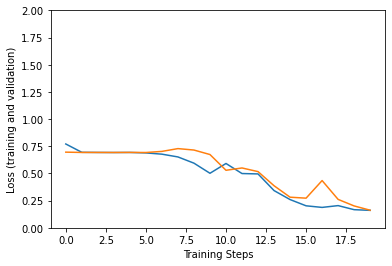

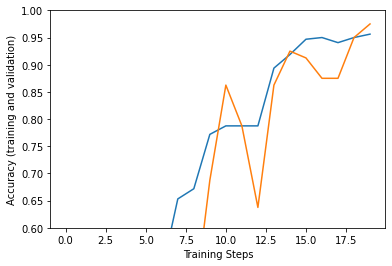

In [ ]:
import numpy as np

# An additional step here is the inclusion of the early stopping callback. This will make
# it so that if the performance of the model does not improve for 2 consecutive epochs
# (in this case, given by patience = 2), the training will stop to mitigate overfitting. Also,
# we store the training history for later.



#Callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]
#Removed because it was no longer necessary for this work.


steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
    train_generator,
    epochs = 20,
    verbose = 1,
    steps_per_epoch = steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history



#to Visualize

import matplotlib.pyplot as plt

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0.6,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

final_loss, final_accuracy  = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

model.save("srcim_model3.h5")